In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

In [169]:
sns.set()

In [440]:
diamond = pd.read_csv("diamonds.csv")

In [441]:
diamond.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [442]:
diamond.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [444]:
diamond[diamond.isnull().any(axis=1)]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z


In [445]:
diamond['Unnamed: 0'].value_counts().max()

1

In [446]:
diamond.drop(columns=['Unnamed: 0'],inplace=True)

In [447]:
diamond['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [448]:
cut_score = [1,2,5,4,3]
cut_list = list(diamond['cut'].unique())
cut_list.sort()

cut_dict = dict(zip(cut_list, cut_score))
cut_dict

{'Fair': 1, 'Good': 2, 'Ideal': 5, 'Premium': 4, 'Very Good': 3}

In [449]:
for i, j in cut_dict.items():
    diamond['cut'] = np.where(diamond['cut'] == i, j, diamond['cut'])

In [450]:
diamond['cut'].value_counts()

5    21551
4    13791
3    12082
2     4906
1     1610
Name: cut, dtype: int64

In [451]:
color_score = [1,2,3,4,5,6,7]
color_list = list(diamond['color'].unique())
color_list.sort(reverse=True)

color_dict = dict(zip(color_list, color_score))
color_dict

{'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 6, 'D': 7}

In [452]:
for i, j in color_dict.items():
    diamond['color'] = np.where(diamond['color'] == i, j, diamond['color'])

In [453]:
diamond['color'].value_counts()

4    11292
6     9797
5     9542
3     8304
7     6775
2     5422
1     2808
Name: color, dtype: int64

In [454]:
diamond['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [455]:
clarity_score = [8,9,6,7,4,5,10,3]
clarity_list = list(diamond['clarity'].unique())
clarity_list.sort(reverse=True)
clarity_dict = dict(zip(clarity_list, clarity_score))

In [456]:
for i, j in clarity_dict.items():
    diamond['clarity'] = np.where(diamond['clarity'] == i, j, diamond['clarity'])

In [457]:
diamond['clarity'].value_counts()

5     13065
6     12258
4      9194
7      8171
8      5066
9      3655
10     1790
3       741
Name: clarity, dtype: int64

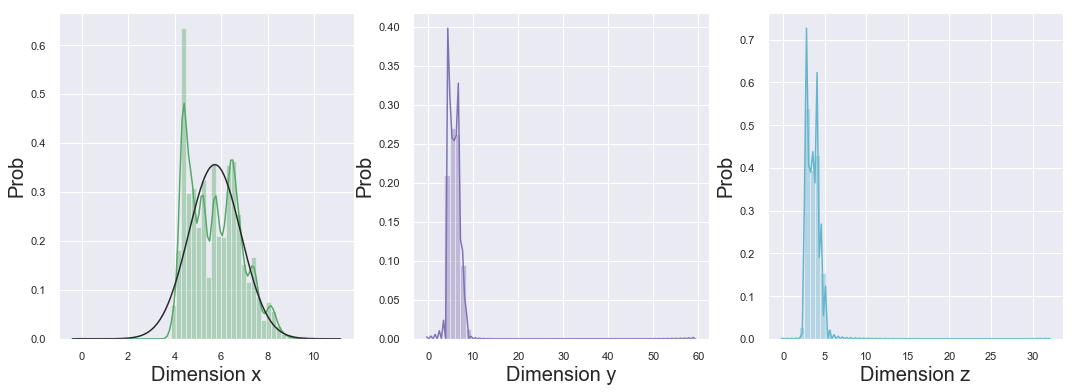

In [458]:
fig, [ax1, ax2, ax3] = plt.subplots(1,3, figsize=(18,6))

from scipy.stats import norm


sns.distplot(diamond['x'], bins=50, ax=ax1, color='g', fit=norm)
sns.distplot(diamond['y'], bins=50, ax=ax2, color='m')
sns.distplot(diamond['z'], bins=50, ax=ax3, color='c')
   
ax1.set_ylabel('Prob', fontsize=20)
ax2.set_ylabel('Prob', fontsize=20)
ax3.set_ylabel('Prob', fontsize=20)
ax1.set_xlabel('Dimension x', fontsize=20)
ax2.set_xlabel('Dimension y', fontsize=20)
ax3.set_xlabel('Dimension z', fontsize=20)

plt.show()

In [460]:
diamond.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [465]:
for i in ['cut','color','clarity']:

    diamond[i] = diamond[i].apply(lambda x: pd.to_numeric(x))

In [466]:
diamond.dtypes

carat      float64
cut          int64
color        int64
clarity      int64
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [467]:
diamond.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,3.904097,4.405803,6.051020,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.116600,1.701105,1.647136,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,1.000000,1.000000,3.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,3.000000,3.000000,5.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,4.000000,4.000000,6.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,5.000000,6.000000,7.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,5.000000,7.000000,10.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# Remove Outliers from dimensions

In [468]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

def outliers_z_score(ys):
    threshold = 3
    mean_y = np.mean(ys)
    stdev_y = np.std(ys)
    z_scores = [(y - mean_y) / stdev_y for y in ys]
    return np.where(np.abs(z_scores) > threshold)


def outliers_iqr_val(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return (lower_bound, upper_bound)






In [469]:
y_out = outliers_iqr(diamond['y'])
y_out2 = outliers_z_score(diamond['y'])
y_out_vals = outliers_iqr_val(diamond['y'])
y_out_vals

(1.9899999999999993, 9.27)

In [470]:
diamond.iloc[y_out[0],:]

,carat,cut,color,clarity,depth,table,price,x,y,z
11963,1.00,3,3,6,63.3,53.0,5139,0.00,0.00,0.00
15951,1.14,1,4,7,57.5,67.0,6381,0.00,0.00,0.00
22741,3.01,1,3,3,56.1,62.0,10761,9.54,9.38,5.31
22831,3.00,2,2,3,57.0,64.0,10863,9.38,9.31,5.33
23644,3.65,1,3,3,67.1,53.0,11668,9.53,9.48,6.38
24067,2.00,4,3,4,58.9,57.0,12210,8.09,58.90,8.06
24131,3.24,4,3,3,62.1,58.0,12300,9.44,9.40,5.85
24297,3.22,5,2,3,62.6,55.0,12545,9.49,9.42,5.92
24328,3.50,5,3,3,62.8,57.0,12587,9.65,9.59,6.03
24520,1.56,5,4,6,62.2,54.0,12800,0.00,0.00,0.00


In [471]:
z_out1 = outliers_iqr(diamond['z'])
z_out2 = outliers_z_score(diamond['z'])
z_out_vals = outliers_iqr_val(diamond['z'])
z_out_vals

(1.2150000000000003, 5.734999999999999)

In [472]:
x_out1 = outliers_iqr(diamond['x'])
x_out2 = outliers_z_score(diamond['x'])
x_out_vals = outliers_iqr_val(diamond['x'])
x_out_vals

(1.9649999999999999, 9.285)

In [473]:
diamond_ro = diamond[(diamond['x']<=10) & (diamond['x']>0)]

In [474]:
diamond_ro = diamond_ro[(diamond_ro['y']<=10) & (diamond_ro['y']>0)]
diamond_ro = diamond_ro[(diamond_ro['z']<=8) & (diamond_ro['z']>0)]

In [475]:
for i in ['table','depth']:
    diamond_ro[i] = diamond_ro[i].apply(lambda x: x/100)

In [476]:
diamond_ro.shape

(53912, 10)

In [477]:
diamond_ro.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [478]:
diamond_ro.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,4,0.615,0.55,326,3.95,3.98,2.43
1,0.21,4,6,5,0.598,0.61,326,3.89,3.84,2.31
2,0.23,2,6,7,0.569,0.65,327,4.05,4.07,2.31
3,0.29,4,2,6,0.624,0.58,334,4.20,4.23,2.63
4,0.31,2,1,4,0.633,0.58,335,4.34,4.35,2.75


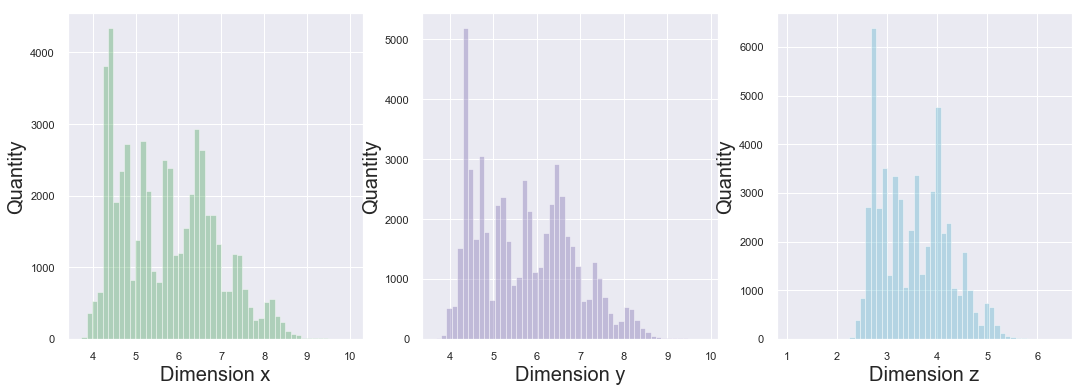

In [479]:
fig, [ax1,ax2,ax3] = plt.subplots(1,3, figsize=(18,6))

sns.distplot(diamond_ro['x'], bins=50, ax=ax1, color='g', kde=False, hist=True, norm_hist=False)#, fit=norm)
sns.distplot(diamond_ro['y'], bins=50, ax=ax2, color='m',kde=False, hist=True, norm_hist=False)#,fit=norm)
sns.distplot(diamond_ro['z'], bins=50, ax=ax3, color='c', kde=False, hist=True, norm_hist=False)#,fit=norm)
   
ax1.set_ylabel('Quantity', fontsize=20)
ax2.set_ylabel('Quantity', fontsize=20)
ax3.set_ylabel('Quantity', fontsize=20)
ax1.set_xlabel('Dimension x', fontsize=20)
ax2.set_xlabel('Dimension y', fontsize=20)
ax3.set_xlabel('Dimension z', fontsize=20)

plt.show()

In [480]:
import math
from scipy.stats import kstest,lognorm


kstest(diamond_ro['x'].apply(math.log), 'norm')

KstestResult(statistic=0.912190026584832, pvalue=0.0)

In [481]:
kstest(diamond_ro['x'], 'norm')

KstestResult(statistic=0.9999042601147311, pvalue=0.0)

In [482]:
kstest(diamond_ro['y'], 'norm')

KstestResult(statistic=0.9998833830231846, pvalue=0.0)

In [483]:
kstest(diamond_ro['z'], 'norm')

KstestResult(statistic=0.990360597430931, pvalue=0.0)

# Standardize Sizes

In [484]:
from sklearn.preprocessing import StandardScaler

# Your code here:
scaler = StandardScaler()
scaled = scaler.fit(diamond_ro[['table','depth','x','y','z',]])
a = scaled.transform(diamond_ro[['table','depth','x','y','z']])
a

array([[-1.09970404, -0.17413775, -1.5923333 , -1.57858363, -1.6049836 ],
       [ 1.58605944, -1.36116319, -1.64597165, -1.70465275, -1.77863051],
       [ 3.37656843, -3.38608894, -1.50293605, -1.49753919, -1.77863051],
       ...,
       [ 1.1384322 ,  0.73358759, -0.06364032, -0.04774427,  0.03019141],
       [ 0.2431777 , -0.52326288,  0.3744062 ,  0.34847297,  0.29066177],
       [-1.09970404,  0.31463743,  0.088335  ,  0.12334954,  0.14595601]])

In [485]:
b = pd.DataFrame(a, columns=['table_s','depth_s','x_s','y_s','z_s'])
b.shape

(53912, 5)

In [486]:
b.isna().sum()

table_s    0
depth_s    0
x_s        0
y_s        0
z_s        0
dtype: int64

In [487]:
diamond_ro_st = diamond_ro.copy()

diamond_ro_st['table_s'] = a[:,0]
diamond_ro_st['depth_s'] = a[:,1]
diamond_ro_st['x_s'] = a[:,2]
diamond_ro_st['y_s'] = a[:,3]
diamond_ro_st['z_s'] = a[:,4]

In [488]:
diamond_ro_st.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z,table_s,depth_s,x_s,y_s,z_s
0,0.23,5,6,4,0.615,0.55,326,3.95,3.98,2.43,-1.099704,-0.174138,-1.592333,-1.578584,-1.604984
1,0.21,4,6,5,0.598,0.61,326,3.89,3.84,2.31,1.586059,-1.361163,-1.645972,-1.704653,-1.778631
2,0.23,2,6,7,0.569,0.65,327,4.05,4.07,2.31,3.376568,-3.386089,-1.502936,-1.497539,-1.778631
3,0.29,4,2,6,0.624,0.58,334,4.20,4.23,2.63,0.243178,0.454287,-1.368840,-1.353460,-1.315572
4,0.31,2,1,4,0.633,0.58,335,4.34,4.35,2.75,0.243178,1.082713,-1.243684,-1.245401,-1.141925


In [489]:
diamond_ro_st.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
table_s    0
depth_s    0
x_s        0
y_s        0
z_s        0
dtype: int64

In [490]:
diamond_ro_st = diamond_ro_st.drop(columns=['table','depth','x','y','z'])

In [497]:
diamond_ro_st.columns

Index(['carat', 'cut', 'color', 'clarity', 'price', 'table_s', 'depth_s',
       'x_s', 'y_s', 'z_s'],
      dtype='object')

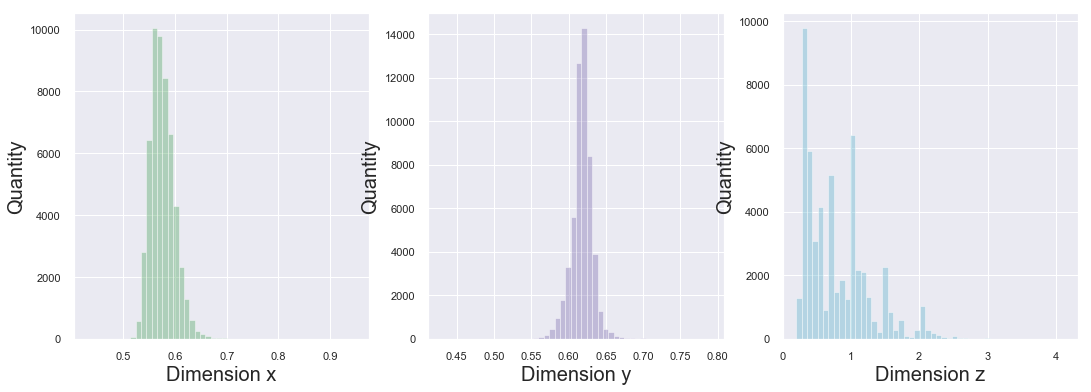

In [492]:
fig, [ax1,ax2,ax3] = plt.subplots(1,3, figsize=(18,6))

sns.distplot(diamond_ro['table'], bins=50, ax=ax1, color='g', kde=False, hist=True, norm_hist=False)#, fit=norm)
sns.distplot(diamond_ro['depth'], bins=50, ax=ax2, color='m',kde=False, hist=True, norm_hist=False)#,fit=norm)
sns.distplot(diamond_ro['carat'], bins=50, ax=ax3, color='c', kde=False, hist=True, norm_hist=False)#,fit=norm)
   
ax1.set_ylabel('Quantity', fontsize=20)
ax2.set_ylabel('Quantity', fontsize=20)
ax3.set_ylabel('Quantity', fontsize=20)
ax1.set_xlabel('Dimension x', fontsize=20)
ax2.set_xlabel('Dimension y', fontsize=20)
ax3.set_xlabel('Dimension z', fontsize=20)

plt.show()

In [518]:
diamond_ro_st_noP = diamond_ro_st.drop(columns=['price'])

In [530]:
diamond_ro_st_sc  = diamond_ro_st.copy()
diamond_ro_st_sc.reset_index(drop=True,inplace=True)
diamond_ro_st_sc.shape

(53912, 10)

In [531]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()


min_max_scaler = preprocessing.MinMaxScaler()

def scaleColumns(df, cols_to_scale):
    for col in cols_to_scale:
        df[col] = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(df[col])),columns=[col])
    return df


diamond_ro_st_sc = scaleColumns(diamond_ro_st_sc ,['carat','cut','color','clarity','price'])
diamond_ro_st_sc.head()

C:\Users\Tom N\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Tom N\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Tom N\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Tom N\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,carat,cut,color,clarity,price,table_s,depth_s,x_s,y_s,z_s
0,0.007634,1.00,0.833333,0.142857,0.000000,-1.099704,-0.174138,-1.592333,-1.578584,-1.604984
1,0.002545,0.75,0.833333,0.285714,0.000000,1.586059,-1.361163,-1.645972,-1.704653,-1.778631
2,0.007634,0.25,0.833333,0.571429,0.000054,3.376568,-3.386089,-1.502936,-1.497539,-1.778631
3,0.022901,0.75,0.166667,0.428571,0.000433,0.243178,0.454287,-1.368840,-1.353460,-1.315572
4,0.027990,0.25,0.000000,0.142857,0.000487,0.243178,1.082713,-1.243684,-1.245401,-1.141925


In [532]:
diamond_ro_st_sc_noP = diamond_ro_st_sc.drop(['price'],axis=1)

In [716]:
print(diamond_ro_st.shape)
print(diamond_ro_st_sc.shape)

print(diamond_ro_st_noP.shape)
print(diamond_ro_st_sc_noP.shape)

(53912, 10)
(53912, 10)
(53912, 9)
(53912, 9)


# Create Cluster Class

In [659]:
class ClusterTime:

    '''
    Initialize Class
    '''
    def __init__ (self, data_frame):
    
        self.data_frame = data_frame

        
    '''
    Define method that runs Kmeans clustering
    '''    
    def kmeans_style(self, k, elbow=False, return_new_df=False):
        
        from sklearn import cluster
        from sklearn.metrics import silhouette_score

        kmeans = cluster.KMeans(k)
        clusters = kmeans.fit(self.data_frame)
        self.labels_kmeans = clusters.fit_predict(self.data_frame)
        
        self.sil_score_kmeans = (round(silhouette_score(self.data_frame,self.labels_kmeans, metric = 'euclidean'),k))
        print(f"Silhouette Score for Kmeans with k={k} = {self.sil_score_kmeans}")
        
        self.kmeans_centers = kmeans.cluster_centers_
        
        if elbow == True:
            
            model = cluster.KMeans()
            self.ElbowRoom(model)
          
        
        if return_new_df == True:
        
            return self.merge_df('label-kmeans', self.labels_kmeans) 
        
        else:
            return self.labels_kmeans
    
    '''
    Function that uses Kmeans clustering using the PCA-transformed dataframe
    '''
    
    def kmeans_style_pca(self, k, elbow=False, return_new_df=False):
        
        from sklearn import cluster
        from sklearn.metrics import silhouette_score

        kmeans = cluster.KMeans(k)
        clusters = kmeans.fit(self.ppc)
        self.labels_kmeans_pca = clusters.fit_predict(self.ppc)
        
        self.sil_score_kmeans_pca = (round(silhouette_score(self.ppc,self.labels_kmeans_pca, metric = 'euclidean'),k))
        print(f"Silhouette Score for Kmeans (PCA) with k={k} = {self.sil_score_kmeans_pca}")
        
        self.kmeans_pca_centers = kmeans.cluster_centers_
        
        if elbow == True:
            
            model = cluster.KMeans()
            self.ElbowRoom(model)
            
        if return_new_df == True:
        
            return self.merge_df('label-kmeans-pca', self.labels_kmeans_pca) 
        
        else:
            
            return self.labels_kmeans_pca
    
    '''
    Function that uses DBSCAN clustering, using either the original
    data frame or the PCA-transformed dataframe.
    '''
    def dbscan_style(self, epsilon, return_new_df=False, use_pca=False, show_plot=False):
        
        from sklearn.cluster import DBSCAN
        from sklearn.metrics import silhouette_score
        
        if use_pca == True:
            X = self.ppc
        else:
            X = self.data_frame
        
        dbscan = DBSCAN(eps=epsilon).fit(X)
        self.labels_db = dbscan.labels_
        
        counts = np.bincount(self.labels_db[self.labels_db>=0])
        k = len(counts)
        
        self.sil_score_db = (round(silhouette_score(X,self.labels_db, metric = 'euclidean'),k))
        print(f"Silhouette Score for DBSCAN with epsilon={epsilon} : {self.sil_score_db}")
        print(f" Number of Clusters 'k' = {k}")
        
        if return_new_df == True:
    
            self.merge_df('label-dbscan', self.labels_db)
        
        if show_plot == True:
            
            self.Scatter(scatter_type='pca-dbs')
        
        return self.labels_db
    
    
    def dbscan_style_dca(self, epsilon, return_new_df=False, show_plot=False):
        
        from sklearn.cluster import DBSCAN
        from sklearn.metrics import silhouette_score
        
        dbscan_pca = DBSCAN(eps=epsilon).fit(self.ppc)
        self.labels_dbs_pca = dbscan_pca.labels_
        
        counts = np.bincount(self.labels_dbs_pca[self.labels_dbs_pca>=0])
        k = len(counts)
        
        self.sil_score_db_pca = (round(silhouette_score(self.ppc,self.labels_dbs_pca, metric = 'euclidean'),k))
        print(f"Silhouette Score for DBSCAN with epsilon={epsilon} : {self.sil_score_db_pca}")
        print(f" Number of Clusters 'k' = {k}")
        
        if show_plot == True:
            
            self.Scatter(scatter_type='pca-dbs_pca')
        
        if return_new_df == True:
        
            return(self.merge_df('label-dbscan_pca', self.labels_dbs_pca))
        
        return self.labels_dbs_pca
    
        
    
    
    def hier_style(self):
        
    
        from sklearn.cluster import AgglomerativeClustering
        from sklearn.metrics import silhouette_score
        
        sample = self.data_frame.sample(100)

        #census_sample = census_missing[census_columns].sample(n=100)
        hier_clust = AgglomerativeClustering(linkage='ward')
        hier_fitted = hier_clust.fit(sample)
        
        self.labels_hier = hier_fitted.labels_
        
        counts = np.bincount(self.labels_hier[self.labels_hier>=0])
        k = len(counts)
        
        self.sil_score_hier = (round(silhouette_score(sample,self.labels_hier, metric = 'euclidean'),k))
        print(f"Silhouette Score for Hierarchial Clustering : {self.sil_score_hier}")
        
        self.plot_dendrogram(hier_fitted, labels=self.labels_hier)

  
    def plot_dendrogram(self, model, **kwargs):
        
        from scipy.cluster.hierarchy import dendrogram

        # Children of hierarchical clustering
        children = model.children_

        # Distances between each pair of children
        # Since we don't have this information, we can use a uniform one for plotting
        distance = np.arange(children.shape[0])

        # The number of observations contained in each cluster level
        no_of_observations = np.arange(2, children.shape[0]+2)

        # Create linkage matrix and then plot the dendrogram
        linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

        # Plot the corresponding dendrogram
        dendrogram(linkage_matrix, **kwargs)

    
        
    def merge_df(self,c_method, labels):
        
        merged_frame = self.data_frame.copy()
        merged_frame[str(c_method)] = labels
        
        return merged_frame
        
        
    
    def PCA_transform(self, n_comp):
        
        from sklearn.decomposition import PCA

        pca = PCA(n_comp)
        pc = pca.fit_transform(self.data_frame)
        
        cols = []
        for i in range(0,n_comp):
            x = str(i+1)
            cols.append('pc'+x)
        
        self.ppc = pd.DataFrame(data=pc,columns=cols)
        
        explained_var_ratio = pca.explained_variance_ratio_
        print(f'Total utilization = {sum(explained_var_ratio)}')
        print(self.ppc.shape)
        
        print(pca)
        
        print(pca.explained_variance_ratio_)
    
        
    def ElbowRoom(self, model):
        
        from yellowbrick.cluster import KElbowVisualizer
        
        visualizer = KElbowVisualizer(model, k=(1,12))
        visualizer.fit(self.data_frame)
        visualizer.poof()
        
    def Scatter(self, scatter_type='pca-kmeans'):
        
        colors= np.array(['green','purple','cyan','orange','magenta','blue','yellow','red'])
        #ax[0].scatter(pc.factors.iloc[:,0],pc.factors.iloc[:,1],c=colors[y_pred5])
        
        #Using PCA points, clustering from straight-up kmeans on the full data
        if scatter_type == 'pca-kmeans':
            plt.figure(figsize=(8,6))
            plt.scatter(self.ppc.iloc[:,0],self.ppc.iloc[:,1],c=colors[self.labels_kmeans])
            plt.scatter(self.kmeans_centers[:, 0], self.kmeans_centers[:, 1], c='red', s=50, alpha=0.75)
            
         
        elif scatter_type == 'pca-kmeans_pca':
            plt.figure(figsize=(8,6))
            plt.scatter(self.ppc.iloc[:,0],self.ppc.iloc[:,1],c=colors[self.labels_kmeans_pca])
            plt.scatter(self.kmeans_pca_centers[:, 0], self.kmeans_pca_centers[:, 1], c='red', s=50, alpha=0.75)
        
        elif scatter_type == 'pca-dbs':
            plt.figure(figsize=(8,6))
            plt.scatter(self.ppc.iloc[:,0],self.ppc.iloc[:,1],c=colors[self.labels_db])
            
        elif scatter_type == 'pca-dbs_pca':
            plt.figure(figsize=(8,6))
            plt.scatter(self.ppc.iloc[:,0],self.ppc.iloc[:,1],c=colors[self.labels_dbs_pca])
        
        elif scatter_type == '2d':
            flag = True
            while flag == True:

                x1 = int(input('Enter variable/column number for X1 (1st pair): '))
                x2 = int(input('Enter variable/column number for X2 (1st pair): '))
                x3 = int(input('Enter variable/column number for X3 (2nd pair): '))
                x4 = int(input('Enter variable/column number for X4 (2nd pair): '))
                
                if max(x1,x2,x3,x4) < self.data_frame.shape[1]:
                    print('On y va')
                    flag = False
                else:
                    print('Not acceptable, try again')
            
            fig, ax = plt.subplots(1,2,figsize=(16,4))    
            ax[0].scatter(self.data_frame.iloc[:,x1],self.data_frame.iloc[:,x2],c=colors[self.labels_kmeans])
            ax[1].scatter(self.data_frame.iloc[:,x3],self.data_frame.iloc[:,x4],c=colors[self.labels_kmeans])
            
            ax[0].set_xlabel(xlabel=self.data_frame.columns[x1], fontsize=16)
            ax[0].set_ylabel(ylabel=self.data_frame.columns[x2], fontsize=16)
            ax[1].set_xlabel(xlabel=self.data_frame.columns[x3], fontsize=16)
            ax[1].set_ylabel(ylabel=self.data_frame.columns[x4], fontsize=16)
    
    def TSNE_style(self, labels):
    
        from sklearn.manifold import TSNE

        X = self.data_frame
        colors = np.array(['black','cyan','purple','orange','purple'])
        fig, ax = plt.subplots(1, 4, figsize=(15, 7))
        for i, perp in enumerate([5, 30, 50, 100]):
            tsne = TSNE(perplexity=perp)
            x_embedded = tsne.fit_transform(X)
            ax[i].scatter(x_embedded[:, 0], x_embedded[:, 1], c=colors[labels])
            ax[i].set_title("Perplexity = {}".format(perp))
    
    
    
    
    
    
    
    
    
    
    """
    Outlier Removal Method
    """
    
    def get_df(self):     
        return(self.data_frame)
        

    
   

In [588]:
a = ClusterTime(data_frame=diamond_ro_st_noP)

Silhouette Score for Kmeans with k=3 = 0.216


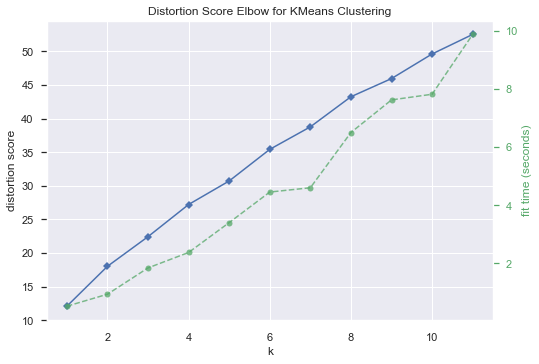

array([2, 2, 2, ..., 2, 1, 2])

In [557]:
a.kmeans_style(3, elbow=True)

Enter variable/column number for X1 (1st pair): 0
Enter variable/column number for X2 (1st pair): 4
Enter variable/column number for X3 (2nd pair): 36
Enter variable/column number for X4 (2nd pair): 4
Not acceptable, try again
Enter variable/column number for X1 (1st pair): 0
Enter variable/column number for X2 (1st pair): 3
Enter variable/column number for X3 (2nd pair): 5
Enter variable/column number for X4 (2nd pair): 7
On y va


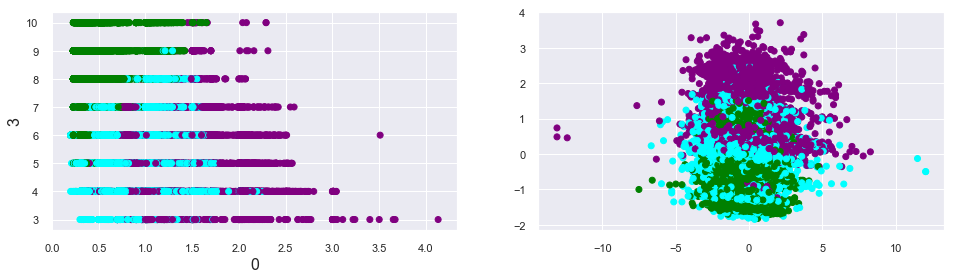

In [558]:
a.Scatter(scatter_type='2d')

Enter variable/column number for X1 (1st pair): 4
Enter variable/column number for X2 (1st pair): 6
Enter variable/column number for X3 (2nd pair): 3
Enter variable/column number for X4 (2nd pair): 8
On y va


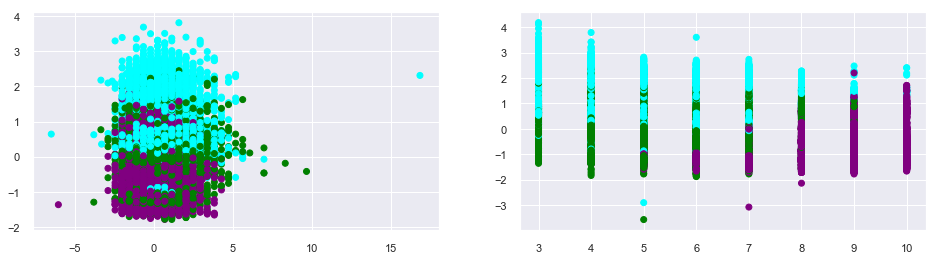

In [551]:
a.Scatter(scatter_type='2d')

In [589]:
a.PCA_transform(n_comp=3)

Total utilization = 0.7452488001164501
(53912, 3)
PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
[0.37005447 0.24299341 0.13220092]


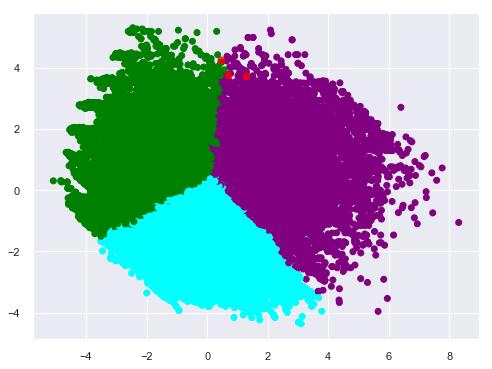

In [560]:
a.Scatter(scatter_type='pca-kmeans')

In [561]:
a.kmeans_style_pca(3)

Silhouette Score for Kmeans (PCA) with k=3 = 0.302


array([2, 2, 2, ..., 2, 1, 2])

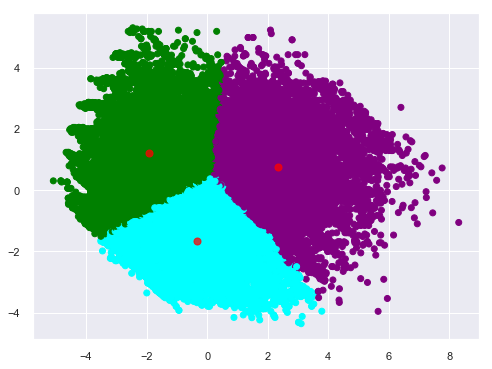

In [562]:
a.Scatter(scatter_type='pca-kmeans_pca')

In [615]:
a.kmeans_style_pca(4)

Silhouette Score for Kmeans (PCA) with k=4 = 0.2667


array([1, 1, 1, ..., 3, 0, 3])

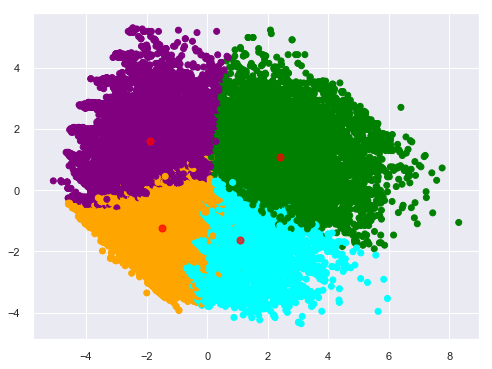

In [564]:
a.Scatter(scatter_type='pca-kmeans_pca')

Silhouette Score for DBSCAN with epsilon=1.2 : 0.007586
 Number of Clusters 'k' = 6


array([ 0,  0, -1, ...,  0,  0,  0], dtype=int64)

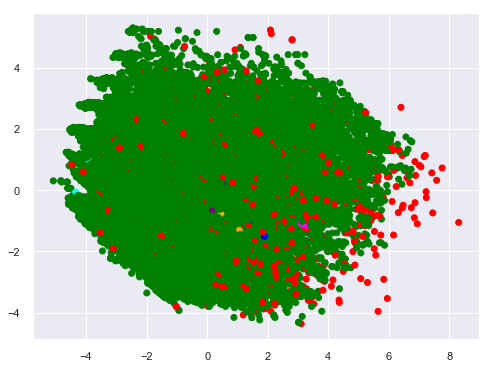

In [585]:
a.dbscan_style(epsilon=1.2, show_plot=True)

Silhouette Score for DBSCAN with epsilon=1.2 : 0.5
 Number of Clusters 'k' = 1


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

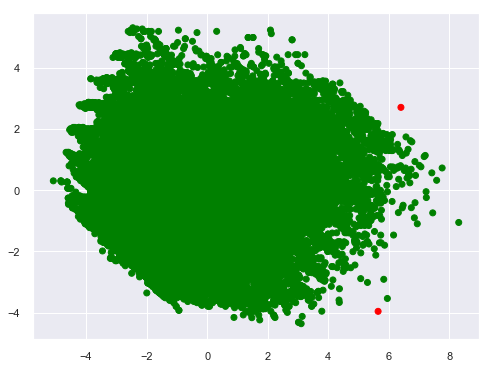

In [590]:
a.dbscan_style_dca(epsilon=1.2, show_plot=True)

Silhouette Score for Hierarchial Clustering : 0.26


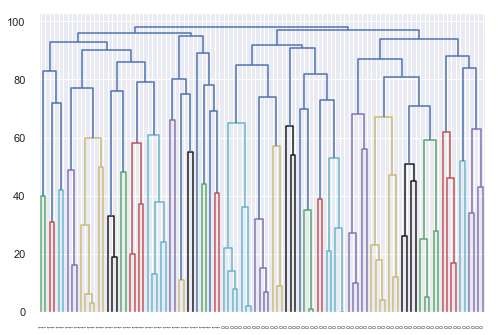

In [594]:
a.hier_style()

# Case B - No Price, numbers standardized AND max/min scaled

In [704]:
b = ClusterTime(data_frame=diamond_ro_st_sc_noP)

Silhouette Score for Kmeans with k=2 = 0.38


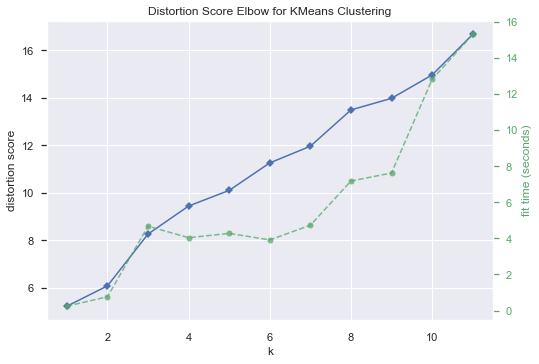

array([1, 1, 1, ..., 0, 0, 1])

In [597]:
b.kmeans_style(2, elbow=True)

Enter variable/column number for X1 (1st pair): 0
Enter variable/column number for X2 (1st pair): 1
Enter variable/column number for X3 (2nd pair): 2
Enter variable/column number for X4 (2nd pair): 3
On y va


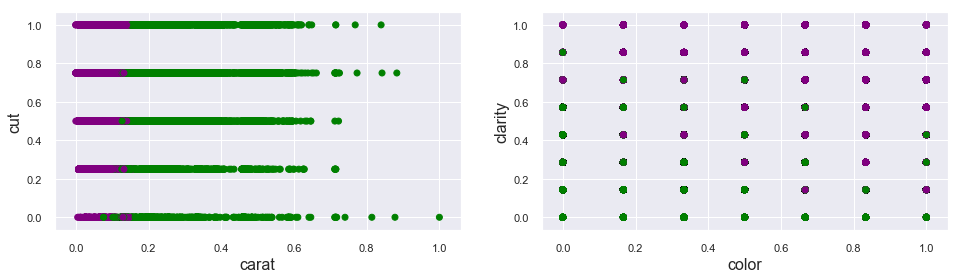

In [605]:
b.Scatter(scatter_type='2d')

Enter variable/column number for X1 (1st pair): 2
Enter variable/column number for X2 (1st pair): 4
Enter variable/column number for X3 (2nd pair): 0
Enter variable/column number for X4 (2nd pair): 5
On y va


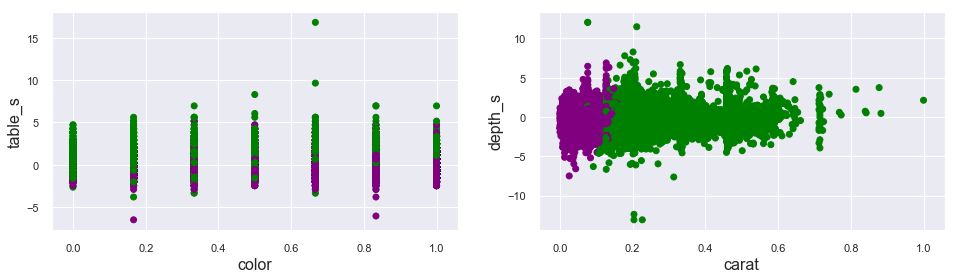

In [606]:
b.Scatter(scatter_type='2d')

In [705]:
b.PCA_transform(n_comp=3)

Total utilization = 0.966506577798783
(53912, 3)
PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
[0.58631006 0.24502734 0.13516917]


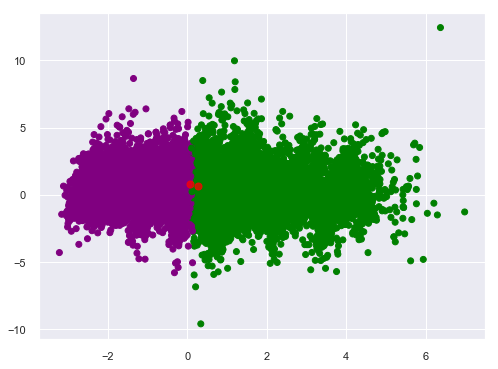

In [608]:
b.Scatter(scatter_type='pca-kmeans')

In [706]:
dfb = b.kmeans_style_pca(2, return_new_df=True)

Silhouette Score for Kmeans (PCA) with k=2 = 0.4


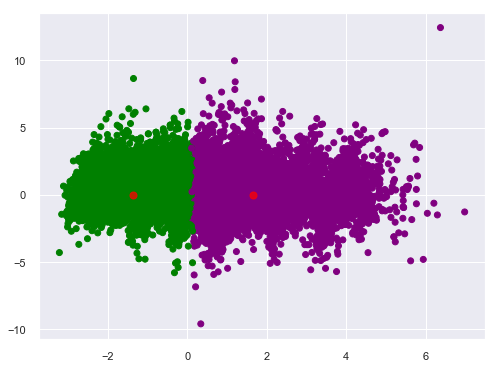

In [611]:
b.Scatter(scatter_type='pca-kmeans_pca')

Silhouette Score for DBSCAN with epsilon=1.2 : 0.6
 Number of Clusters 'k' = 1


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

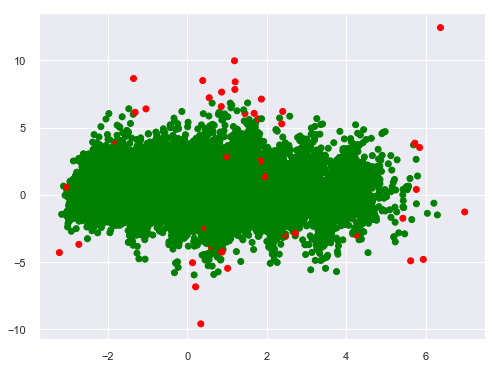

In [616]:
b.dbscan_style(epsilon=1.2, show_plot=True)

Silhouette Score for DBSCAN with epsilon=0.75 : 0.34634
 Number of Clusters 'k' = 5


array([ 0,  0, -1, ...,  0,  0,  0], dtype=int64)

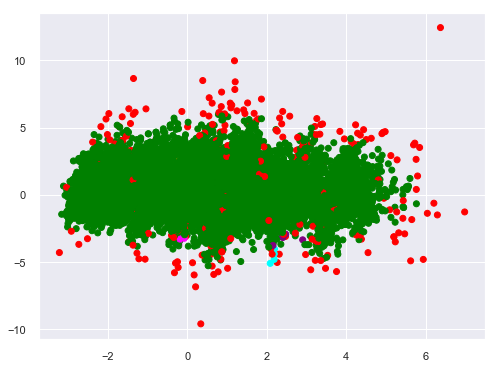

In [618]:
b.dbscan_style(epsilon=0.75, show_plot=True)

Silhouette Score for DBSCAN with epsilon=0.75 : 0.55
 Number of Clusters 'k' = 2


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

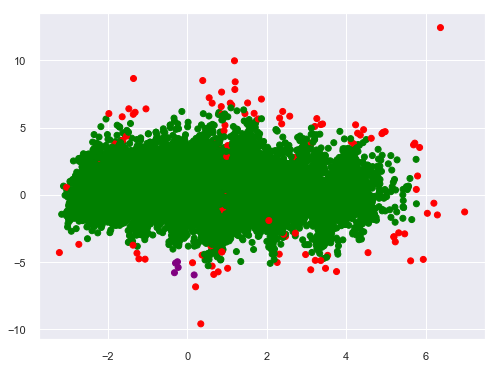

In [619]:
b.dbscan_style_dca(epsilon=0.75, show_plot=True)

Silhouette Score for Hierarchial Clustering : 0.28


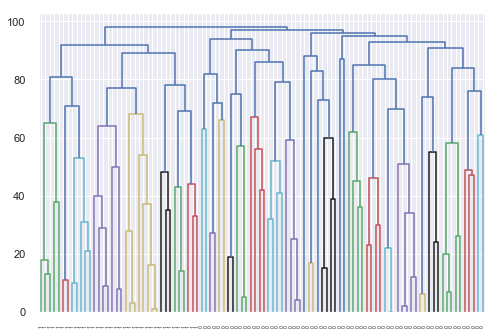

In [620]:
b.hier_style()

In [709]:
dfb['label-kmeans-pca'].value_counts()

1    29613
0    24299
Name: label-kmeans-pca, dtype: int64

In [711]:
diamond_ro_LABELb = diamond_ro.copy()
diamond_ro_LABELb['label-kmp'] = dfb['label-kmeans-pca']

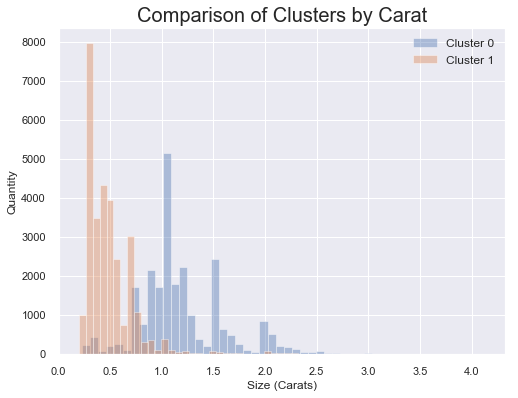

In [713]:
plt.figure(figsize=(8,6))


df = diamond_ro_LABELb[diamond_ro_LABELb['label-kmp'] == 0.0]
sns.distplot(df['carat'],  kde=False, label='Cluster 0')

df = diamond_ro_LABELb[diamond_ro_LABELb['label-kmp'] == 1.0]
sns.distplot(df['carat'],  kde=False,label='Cluster 1')


plt.legend(prop={'size': 12})
plt.title('Comparison of Clusters by Carat', fontsize=20)
plt.xlabel('Size (Carats)')
plt.ylabel('Quantity')

plt.show()

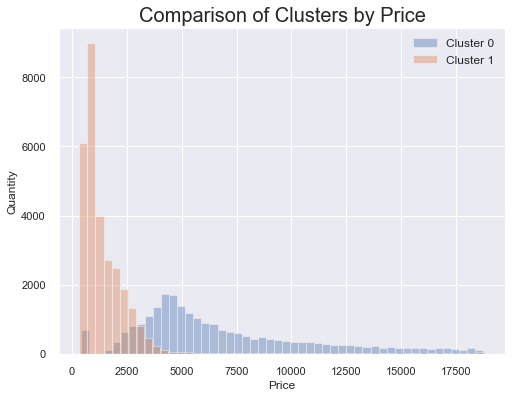

In [714]:
plt.figure(figsize=(8,6))


df = diamond_ro_LABELb[diamond_ro_LABELb['label-kmp'] == 0.0]
sns.distplot(df['price'],  kde=False, label='Cluster 0')

df = diamond_ro_LABELb[diamond_ro_LABELb['label-kmp'] == 1.0]
sns.distplot(df['price'],  kde=False,label='Cluster 1')


plt.legend(prop={'size': 12})
plt.title('Comparison of Clusters by Price', fontsize=20)
plt.xlabel('Price')
plt.ylabel('Quantity')

plt.show()

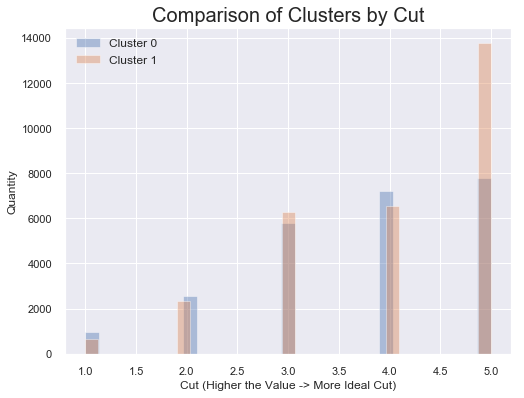

In [715]:
plt.figure(figsize=(8,6))


df = diamond_ro_LABELb[diamond_ro_LABELb['label-kmp'] == 0.0]
sns.distplot(df['cut'],  kde=False, label='Cluster 0')

df = diamond_ro_LABELb[diamond_ro_LABELb['label-kmp'] == 1.0]
sns.distplot(df['cut'],  kde=False,label='Cluster 1')


plt.legend(prop={'size': 12})
plt.title('Comparison of Clusters by Cut', fontsize=20)
plt.xlabel('Cut (Higher the Value -> More Ideal Cut)')
plt.ylabel('Quantity')

plt.show()

# C - With Scaled Price, numbers standardized AND max/min scaled

In [614]:
diamond_ro_st_sc.head(3)

,carat,cut,color,clarity,price,table_s,depth_s,x_s,y_s,z_s
0,0.007634,1.00,0.833333,0.142857,0.000000,-1.099704,-0.174138,-1.592333,-1.578584,-1.604984
1,0.002545,0.75,0.833333,0.285714,0.000000,1.586059,-1.361163,-1.645972,-1.704653,-1.778631
2,0.007634,0.25,0.833333,0.571429,0.000054,3.376568,-3.386089,-1.502936,-1.497539,-1.778631


In [660]:
c = ClusterTime(data_frame=diamond_ro_st_sc)

Silhouette Score for Kmeans with k=2 = 0.38


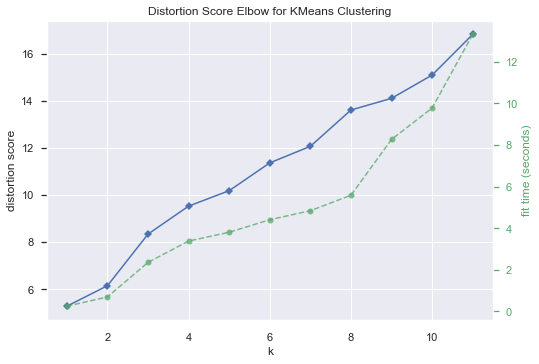

In [645]:
c.kmeans_style(2, elbow=True, return_new_df=False)

Enter variable/column number for X1 (1st pair): 0
Enter variable/column number for X2 (1st pair): 4
Enter variable/column number for X3 (2nd pair): 2
Enter variable/column number for X4 (2nd pair): 4
On y va


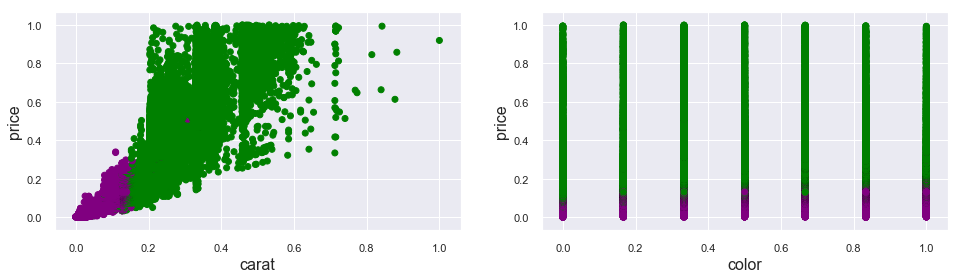

In [625]:
c.Scatter(scatter_type='2d')

Enter variable/column number for X1 (1st pair): 3
Enter variable/column number for X2 (1st pair): 4
Enter variable/column number for X3 (2nd pair): 1
Enter variable/column number for X4 (2nd pair): 4
On y va


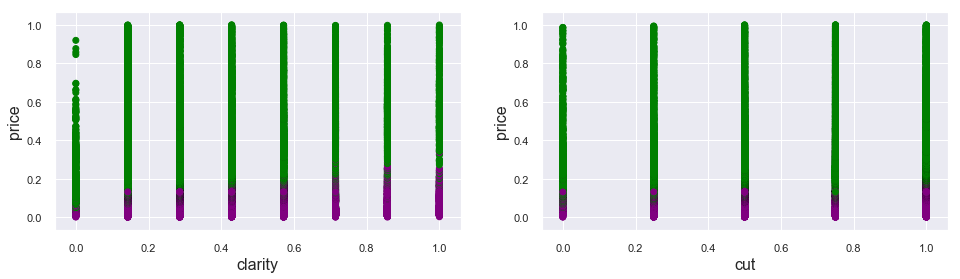

In [624]:
c.Scatter(scatter_type='2d')

Enter variable/column number for X1 (1st pair): 0
Enter variable/column number for X2 (1st pair): 1
Enter variable/column number for X3 (2nd pair): 2
Enter variable/column number for X4 (2nd pair): 3
On y va


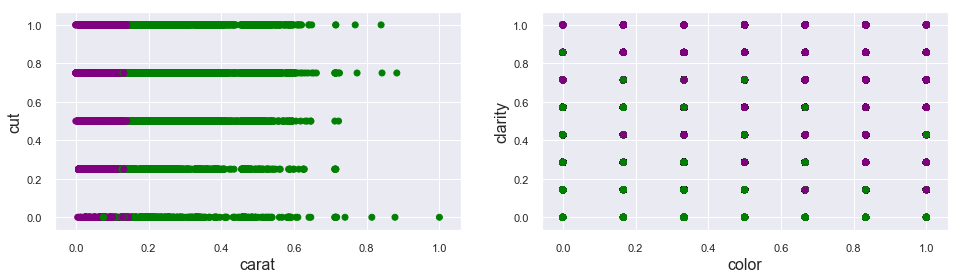

In [627]:
c.Scatter(scatter_type='2d')

In [662]:
c.PCA_transform(n_comp=3)

Total utilization = 0.9649640243669549
(53912, 3)
PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
[0.58798273 0.24291129 0.13407   ]


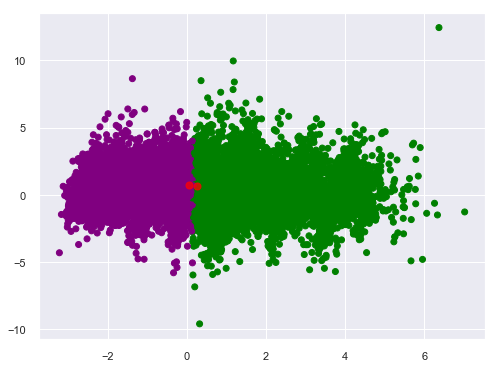

In [629]:
c.Scatter(scatter_type='pca-kmeans')

In [663]:
dfc = c.kmeans_style_pca(2, return_new_df=True)

Silhouette Score for Kmeans (PCA) with k=2 = 0.4


In [667]:
dfc['label-kmeans-pca'].value_counts()

0    29832
1    24080
Name: label-kmeans-pca, dtype: int64

In [668]:
diamond_ro_LABEL = diamond_ro.copy()
diamond_ro_LABEL['label-kmp'] = dfc['label-kmeans-pca']

In [670]:
diamond_ro_LABEL['label-kmp'].value_counts()

0.0    29823
1.0    24061
Name: label-kmp, dtype: int64

In [696]:
diamond_ro_LABEL.groupby(by='label-kmp').mean()

,carat,cut,color,clarity,depth,table,price,x,y,z
label-kmp,,,,,,,,,,
0.0,0.487122,4.026154,4.663582,6.421822,0.617220,0.571342,1516.416357,4.962824,4.969456,3.064743
1.0,1.181958,3.753585,4.086696,5.593575,0.617833,0.578560,6922.350983,6.683475,6.679360,4.127083


In [697]:
diamond_ro_LABEL.groupby(by='label-kmp').std()

,carat,cut,color,clarity,depth,table,price,x,y,z
label-kmp,,,,,,,,,,
0.0,0.228079,1.091753,1.635787,1.679300,0.013215,0.021862,1588.011318,0.657781,0.653530,0.407809
1.0,0.410734,1.128377,1.725790,1.483136,0.015580,0.022283,4035.989963,0.792937,0.784606,0.489165


In [674]:
pd.crosstab(diamond_ro_LABEL.cut,diamond_ro_LABEL['label-kmp'])

label-kmp,0.0,1.0
cut,,
1,651,956
2,2377,2520
3,6356,5716
4,6596,7174
5,13843,7695


In [694]:
pd.crosstab(diamond_ro_LABEL.carat,diamond_ro_LABEL['label-kmp']).head(10)

label-kmp,0.0,1.0
carat,,
0.20,12,0
0.21,9,0
0.22,5,0
0.23,291,2
0.24,243,11
0.25,193,19
0.26,236,17
0.27,215,18
0.28,181,17


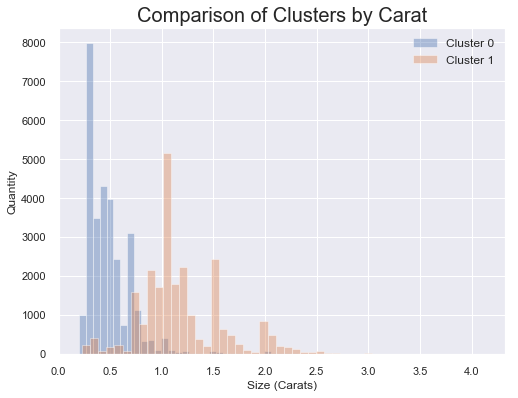

In [686]:
plt.figure(figsize=(8,6))


df = diamond_ro_LABEL[diamond_ro_LABEL['label-kmp'] == 0.0]
sns.distplot(df['carat'],  kde=False, label='Cluster 0')

df = diamond_ro_LABEL[diamond_ro_LABEL['label-kmp'] == 1.0]
sns.distplot(df['carat'],  kde=False,label='Cluster 1')


plt.legend(prop={'size': 12})
plt.title('Comparison of Clusters by Carat', fontsize=20)
plt.xlabel('Size (Carats)')
plt.ylabel('Quantity')

plt.show()

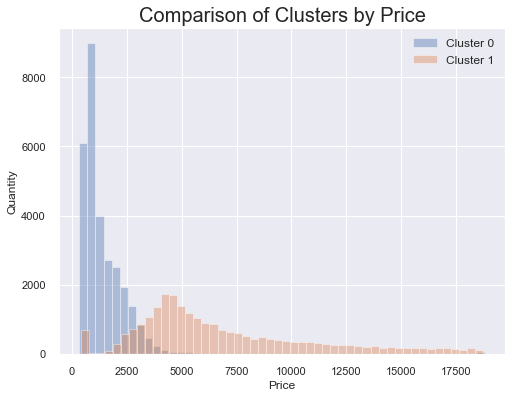

In [687]:
plt.figure(figsize=(8,6))


df = diamond_ro_LABEL[diamond_ro_LABEL['label-kmp'] == 0.0]
sns.distplot(df['price'],  kde=False, label='Cluster 0')

df = diamond_ro_LABEL[diamond_ro_LABEL['label-kmp'] == 1.0]
sns.distplot(df['price'],  kde=False,label='Cluster 1')


plt.legend(prop={'size': 12})
plt.title('Comparison of Clusters by Price', fontsize=20)
plt.xlabel('Price')
plt.ylabel('Quantity')

plt.show()

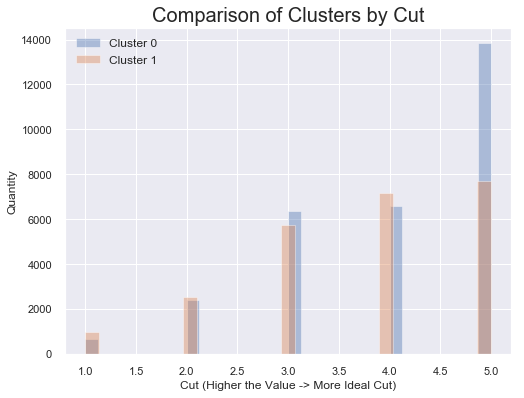

In [690]:
plt.figure(figsize=(8,6))


df = diamond_ro_LABEL[diamond_ro_LABEL['label-kmp'] == 0.0]
sns.distplot(df['cut'],  kde=False, label='Cluster 0')

df = diamond_ro_LABEL[diamond_ro_LABEL['label-kmp'] == 1.0]
sns.distplot(df['cut'],  kde=False,label='Cluster 1')


plt.legend(prop={'size': 12})
plt.title('Comparison of Clusters by Cut', fontsize=20)
plt.xlabel('Cut (Higher the Value -> More Ideal Cut)')
plt.ylabel('Quantity')

plt.show()

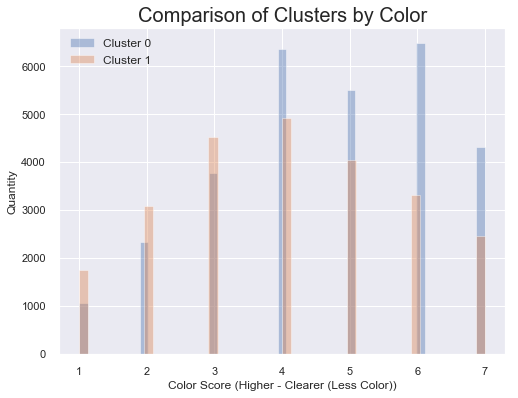

In [689]:
plt.figure(figsize=(8,6))


df = diamond_ro_LABEL[diamond_ro_LABEL['label-kmp'] == 0.0]
sns.distplot(df['color'],  kde=False, label='Cluster 0')

df = diamond_ro_LABEL[diamond_ro_LABEL['label-kmp'] == 1.0]
sns.distplot(df['color'],  kde=False,label='Cluster 1')


plt.legend(prop={'size': 12})
plt.title('Comparison of Clusters by Color', fontsize=20)
plt.xlabel('Color Score (Higher - Clearer (Less Color))')
plt.ylabel('Quantity')

plt.show()

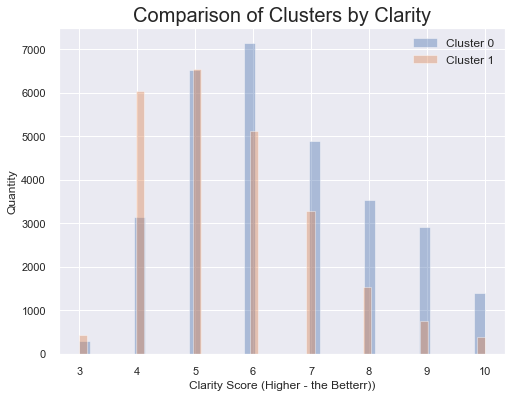

In [693]:
plt.figure(figsize=(8,6))


df = diamond_ro_LABEL[diamond_ro_LABEL['label-kmp'] == 0.0]
sns.distplot(df['clarity'],  kde=False, label='Cluster 0')

df = diamond_ro_LABEL[diamond_ro_LABEL['label-kmp'] == 1.0]
sns.distplot(df['clarity'],  kde=False,label='Cluster 1')


plt.legend(prop={'size': 12})
plt.title('Comparison of Clusters by Clarity', fontsize=20)
plt.xlabel('Clarity Score (Higher - the Betterr))')
plt.ylabel('Quantity')

plt.show()